In [5]:
import pandas as pd

In [9]:
df = pd.read_csv("Datos.csv")

In [19]:
df.head()

,provincia,zona,titulo,PrecioActual,PrecioAnterior,metros,habitaciones,ascensor,localizacion,planta,baños,tags,descripcion,Enlace
0,madrid,ciudad-lineal,"Piso en calle de San Marcelo, 22, Ventas, Madrid",355000,0,69,2.0,S,EXTERIOR,5ª,1,"VIVIENDA,LUMINOSO,VISTAS,REFORMADA,PORTERO,EXT...",Particular Vende vivienda totalmente reformada...,https://www.idealista.com/inmueble/106956987/
1,madrid,carabanchel,"Piso en calle Cabo Nicolás Mur, San Isidro, Ma...",149000,159000,91,3.0,N,EXTERIOR,1ª,0,"PISO,EXCLUSIVA,INMOBILIARIA,OPORTUNIDAD",Inmobiliarias Encuentro vende en exclusiva la ...,https://www.idealista.com/inmueble/106906044/
2,madrid,centro,"Piso en calle de Rodas, Lavapiés-Embajadores, ...",195000,0,36,1.0,S,NaN,2ª,0,"EXCLUSIVA,ESTUDIO",ESTUDIO EN PLENO CENTRO DE MADRIDSarago Servic...,https://www.idealista.com/inmueble/107306175/
3,madrid,usera,"Piso en calle de Ferroviarios, Almendrales, Ma...",195000,0,58,1.0,S,INTERIOR,BAJO,0,"VIVIENDA,HOGAR,FUNCIONAL","Esta acogedora vivienda, ubicada en una planta...",https://www.idealista.com/inmueble/106325171/
4,madrid,tetuan,"Dúplex en Bellas Vistas, Madrid",715000,750000,140,3.0,S,EXTERIOR,2ª,0,"TERRAZA,EXCLUSIVA,MODERNO","Maravilloso ATICO de reciente construcción, co...",https://www.idealista.com/inmueble/106627265/


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11826 entries, 0 to 11825
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   provincia       11826 non-null  object 
 1   zona            11826 non-null  object 
 2   titulo          11826 non-null  object 
 3   PrecioActual    11826 non-null  int64  
 4   PrecioAnterior  11826 non-null  int64  
 5   metros          11826 non-null  int64  
 6   habitaciones    11460 non-null  float64
 7   ascensor        11033 non-null  object 
 8   localizacion    10730 non-null  object 
 9   planta          10601 non-null  object 
 10  baños           11826 non-null  int64  
 11  tags            11664 non-null  object 
 12  descripcion     11761 non-null  object 
 13  Enlace          11826 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 1.3+ MB


In [28]:
df.isnull().sum()

provincia            0
zona                 0
titulo               0
PrecioActual         0
PrecioAnterior       0
metros               0
habitaciones       366
ascensor           793
localizacion      1096
planta            1225
baños                0
tags               162
descripcion         65
Enlace               0
dtype: int64

In [43]:
df.shape

(11826, 14)

## Distribución del precio de venta

Este histograma muestra la distribución de los precios actuales de venta (`PrecioActual`). Podemos observar si hay concentración de propiedades en ciertos rangos de precio, así como la presencia de outliers o valores extremos. Este análisis inicial nos permite tener una idea general del rango de precios y su frecuencia.

*Pregunta guía:* ¿La mayoría de los pisos se venden por debajo de qué cantidad?


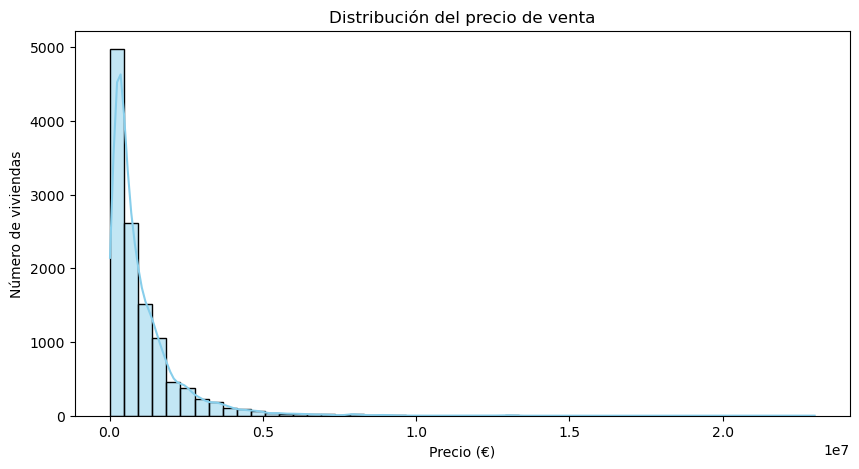

In [32]:
# Histograma del precio
plt.figure(figsize=(10, 5))
sns.histplot(df["PrecioActual"], kde=True, color="skyblue", bins=50)
plt.title("Distribución del precio de venta")
plt.xlabel("Precio (€)")
plt.ylabel("Número de viviendas")
plt.show()

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

## Relación entre superficie y precio

El siguiente gráfico de dispersión compara la superficie del inmueble (`metros`) con su precio de venta. Nos permite visualizar si existe una relación lineal o no, y detectar outliers (por ejemplo, pisos muy pequeños pero con precios muy altos).

*Observación esperada:* En general, cuanto mayor es la superficie, mayor es el precio, aunque pueden influir otros factores como la zona o el estado del inmueble.


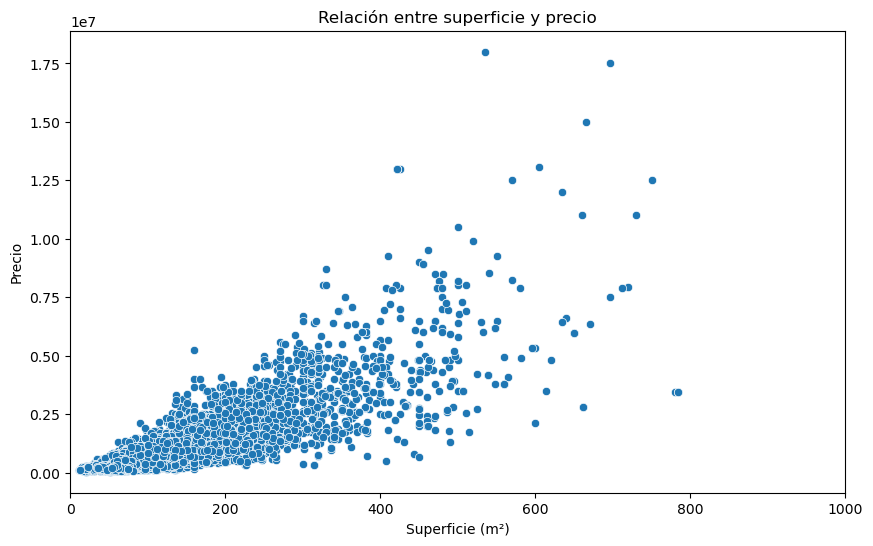

In [123]:
# Scatter plot superficie vs precio
plt.figure(figsize=(10, 6))
sns.scatterplot(x="metros", y="PrecioActual", data=df)
plt.title("Relación entre superficie y precio")
plt.xlabel("Superficie (m²)")
plt.ylabel("Precio") 
plt.xlim((0,1000))
plt.show()

## Precio según número de habitaciones

Aquí analizamos la relación entre el número de habitaciones y el precio de venta. Un boxplot permite ver la mediana, cuartiles y valores atípicos para cada grupo.

*Objetivo:* Entender si tener más habitaciones implica un mayor precio de forma consistente o si hay variaciones significativas.


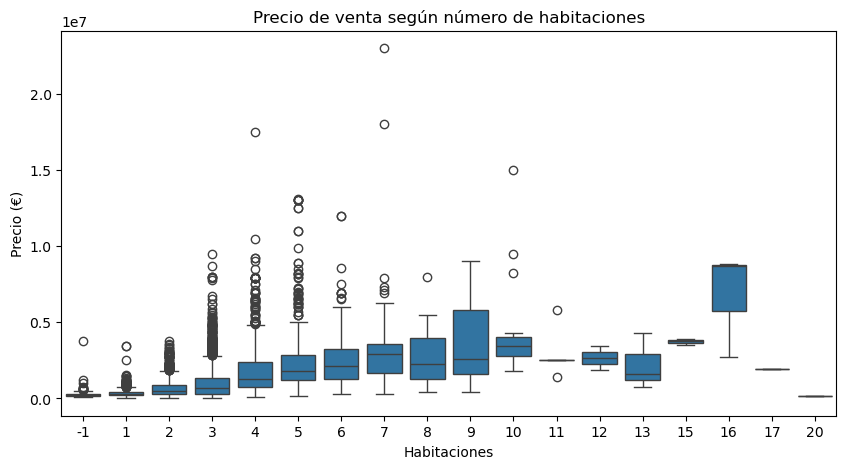

In [36]:
# Convertir habitaciones a entero para agrupar
df["habitaciones"] = df["habitaciones"].fillna(-1).astype(int)  # luego imputaremos bien

# Boxplot para ver distribución del precio según habitaciones
plt.figure(figsize=(10, 5))
sns.boxplot(x="habitaciones", y="PrecioActual", data=df)
plt.title("Precio de venta según número de habitaciones")
plt.xlabel("Habitaciones")
plt.ylabel("Precio (€)")
plt.show()


## Precio de venta por zona (Top 15)

Este gráfico compara la distribución de precios en las 15 zonas más frecuentes del dataset. Es útil para identificar barrios más caros y más económicos, así como la variabilidad del precio dentro de cada uno.

*Aplicación futura:* Esta visualización podría ser muy útil para inversores que buscan zonas con mejor relación calidad-precio o potencial de crecimiento.


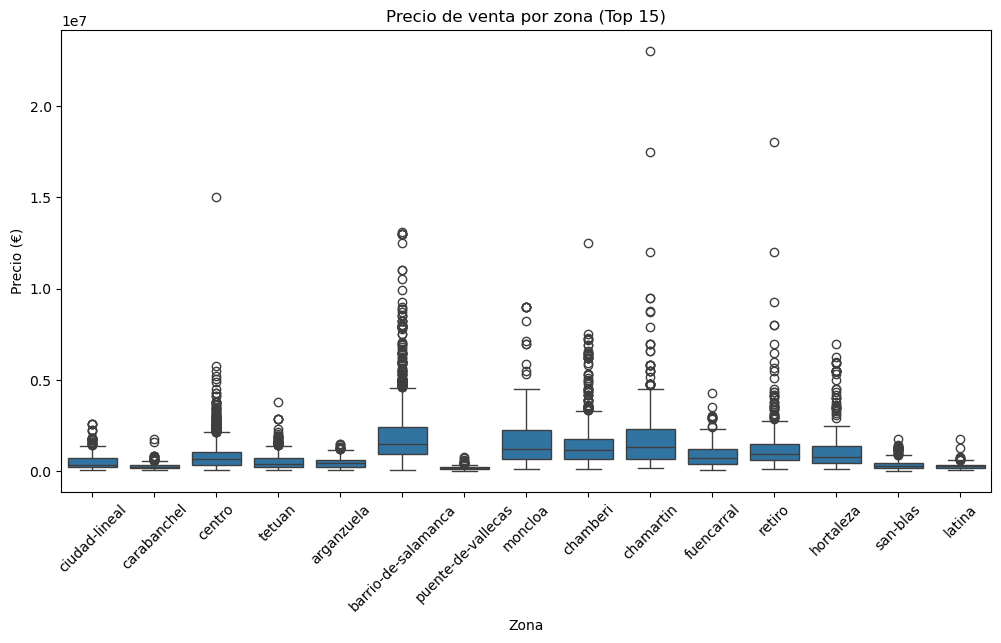

In [38]:
# Top 15 zonas más frecuentes
top_zonas = df["zona"].value_counts().nlargest(15).index

plt.figure(figsize=(12, 6))
sns.boxplot(x="zona", y="PrecioActual", data=df[df["zona"].isin(top_zonas)])
plt.xticks(rotation=45)
plt.title("Precio de venta por zona (Top 15)")
plt.xlabel("Zona")
plt.ylabel("Precio (€)")
plt.show()


In [125]:
df.nunique()

provincia             1
zona                 21
titulo             4977
PrecioActual       1763
PrecioAnterior      428
metros              466
habitaciones         17
ascensor              3
localizacion          2
planta               28
baños                 8
tags               7698
descripcion        9943
Enlace            10730
precio_m2          6366
dtype: int64

## Mapa de correlación de variables numéricas

La matriz de correlación muestra la relación entre variables numéricas del dataset. Nos ayuda a identificar cuáles están más relacionadas con el precio de venta (`PrecioActual`) y, por tanto, podrían ser importantes para el modelo predictivo.

*Atención especial:* A la correlación de `metros`, `habitaciones` y `baños` con `PrecioActual`, ya que suelen ser predictores clave.


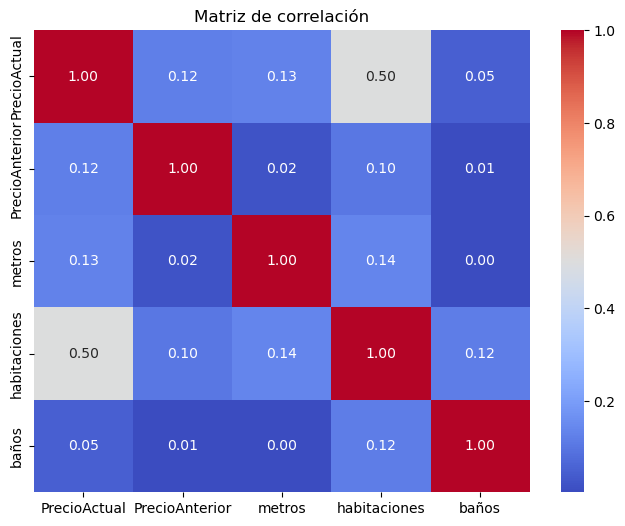

In [40]:
# Correlación entre variables numéricas
corr = df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()


In [74]:
# Imputo habitaciones con la moda (valor más frecuente)
df["habitaciones"] = df["habitaciones"].fillna(df["habitaciones"].mode()[0])

# Ascensor: relleno con "desconocido"
df["ascensor"] = df["ascensor"].fillna("desconocido")

# Planta: relleno con "desconocido"
df["planta"] = df["planta"].fillna("desconocido")

# Tags y descripción: relleno con string vacío
df["tags"] = df["tags"].fillna("")
df["descripcion"] = df["descripcion"].fillna("")

# Localización: decidí eliminar esos registros porque no usé mapa
df = df.dropna(subset=["localizacion"])

In [76]:
# Creé variable de precio por metro cuadrado
df["precio_m2"] = df["PrecioActual"] / df["metros"]

In [78]:
# Eliminé columnas irrelevantes
df_modelo = df.drop(columns=["provincia", "titulo", "PrecioAnterior", "tags", "descripcion", "Enlace", "localizacion"])

In [80]:
# Convertí variables categóricas en dummies (One Hot Encoding)
df_modelo = pd.get_dummies(df_modelo, columns=["zona", "ascensor", "planta"], drop_first=True)

In [84]:
# Verifico que ya no hay valores nulos
print(df_modelo.isnull().sum().sum())

# Verifico el nuevo shape del dataset
print(df_modelo.shape)

# Visualizo las primeras filas
df_modelo.head()

0
(10730, 54)


,PrecioActual,metros,habitaciones,baños,precio_m2,zona_barajas,zona_barrio-de-salamanca,zona_carabanchel,zona_centro,zona_chamartin,...,planta_4ª,planta_5ª,planta_6ª,planta_7ª,planta_8ª,planta_9ª,planta_BAJO,planta_ENTREPLANTA,planta_SÓTANO,planta_desconocido
0,355000,69,2,1,5144.927536,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,149000,91,3,0,1637.362637,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,195000,58,1,0,3362.068966,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,715000,140,3,0,5107.142857,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1257000,135,3,0,9311.111111,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Modelado predictivo

## Primer modelo: Regresión Lineal

Se utilizó una regresión lineal como modelo base para establecer una línea de comparación para modelos más complejos. El dataset fue dividido en un 80% para entrenamiento y un 20% para test.

**Métricas obtenidas:**
- MAE: Error medio absoluto (cuánto se desvía la predicción del valor real).
- RMSE: Raíz del error cuadrático medio (penaliza más los errores grandes).
- R²: Proporción de la varianza explicada por el modelo.

Este modelo servirá como punto de partida para comparar otros algoritmos como Random Forest o XGBoost.


In [87]:
# y será la variable objetivo
y = df_modelo["PrecioActual"]

# X serán todas las demás columnas excepto PrecioActual
X = df_modelo.drop(columns=["PrecioActual"])

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Entrenar modelo
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

# Predecir sobre test
y_pred = modelo_lr.predict(X_test)

# Evaluación
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R²:", round(r2, 4))

MAE: 395173.82
RMSE: 627586.22
R²: 0.6708


 ### Conclusión:
El resultado no es malo, con un porcentaje de variabilidad del 67% pero podríamos ajustarlo más con otro modelo predictivo como Random Forest o XGBoost.

### Random Forest Regressor

In [98]:
from sklearn.ensemble import RandomForestRegressor

# Crear el modelo
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar con los datos
rf.fit(X_train, y_train)

# Predecir
y_pred_rf = rf.predict(X_test)

In [100]:
# Evaluar el rendimiento del modelo
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest - MAE:", round(mae_rf, 2))
print("Random Forest - RMSE:", round(rmse_rf, 2))
print("Random Forest - R²:", round(r2_rf, 4))


Random Forest - MAE: 9412.0
Random Forest - RMSE: 46647.38
Random Forest - R²: 0.9982


### Conclusión:
Con el modelo de Random Forest hemos reducido el MAE más de un 97%, con esto podemos indicar predicciones de valores más reales. El **R²** cercano a 1 significa que el modelo explica prácticamente toda la variabilidad del precio.

### XGBoost

In [102]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.8 MB/s eta 0:00:00a 0:00:01


In [108]:
import xgboost as xgb

# Crear el modelo
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Entrenar
xgb_model.fit(X_train, y_train)

# Predecir
y_pred_xgb = xgb_model.predict(X_test)

In [110]:
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost - MAE:", round(mae_xgb, 2))
print("XGBoost - RMSE:", round(rmse_xgb, 2))
print("XGBoost - R²:", round(r2_xgb, 4))

XGBoost - MAE: 17470.89
XGBoost - RMSE: 50437.56
XGBoost - R²: 0.9979


## Comparación final de modelos

Se entrenaron tres modelos distintos para predecir el precio de viviendas en Madrid: Regresión Lineal, Random Forest y XGBoost.

| Modelo             | MAE (€)    | RMSE (€)    | R²     |
|--------------------|------------|-------------|--------|
| Regresión Lineal   | 395,173.82 | 627,586.22  | 0.6708 |
| Random Forest      | 9,412.00   | 46,647.38   | 0.9982 |
| XGBoost Regressor  | 17,470.89  | 50,437.56   | 0.9979 |

**Conclusión:** El modelo de Random Forest obtuvo el mejor rendimiento general, tanto en precisión como en capacidad explicativa. Será el modelo elegido para generar predicciones y crear visualizaciones orientadas a la toma de decisiones.


### Preparando datos para exportar a Tableau

In [115]:
# Crear DataFrame con predicciones
df_resultados = X_test.copy()
df_resultados["PrecioActual"] = y_test.values
df_resultados["Precio_Predicho"] = rf.predict(X_test)

In [117]:
# Exportar a archivo CSV para Tableau
df_resultados.to_csv("predicciones_para_tableau.csv", index=False)
print("Archivo exportado correctamente.")

Archivo exportado correctamente.
